In [400]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [401]:
#solving by backward central scheme

In [402]:
#setting a class of finite difference grid
class FDGrid:

    def __init__(self, nx, nb=1, xmin= -2.0, xmax= 2.0):
        """create a grid with nx points, nb boundary points (on each end)
        that runs from [xmin, xmax]"""

        self.xmin = xmin
        self.xmax = xmax
        self.nb = nb
        self.nx = nx

        # python is zero-based.  Make easy integers to know where the real data lives
        self.first = nb  #first point in the domain
        self.last = nb+nx-1 #last point in the domain

        # physical coordinates
        self.dx = (xmax - xmin)/(nx-1)
        self.x = xmin + (np.arange(nx+2*nb)-nb)*self.dx

        # storage for the solution
        self.u = np.zeros((nx+2*nb), dtype=np.float64)
        self.uinit = np.zeros((nx+2*nb), dtype=np.float64)
        
    def scratch_array(self):
        """ return a scratch array dimensioned for our grid """
        return np.zeros((self.nx+2*self.nb), dtype=np.float64)

    def fill_BCs(self):
        """ fill the a single ghostcell with periodic boundary conditions """
        self.u[self.first-1] = self.u[self.last-1]
        self.u[self.last+1] = self.u[self.first+1]
        
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)

        ax.plot(self.x[self.first:self.last+1], self.uinit[self.first:self.last+1], label="initial conditions")
        ax.plot(self.x[self.first:self.last+1], self.u[self.first:self.last+1])
        ax.legend()
        return fig

In [403]:
def ftcs_advection(nx, u, C, num_periods=1.0, init_cond=None):
    """solve the linear advection equation using FTCS.  You are required
    to pass in a function f(g), where g is a FDGrid object that sets up
    the initial conditions"""
    
    g = FDGrid(nx)
    
    # time info
    dt = C*g.dx/u
    t = 0.0
    tmax = num_periods*(g.xmax - g.xmin)/np.abs(u)

    # initialize the data
    init_cond(g)

    g.uinit[:] = g.u[:]
    
    # evolution loop
    unew = g.scratch_array()

    while t < tmax:

        if t + dt > tmax:
            dt = tmax - t
            C = u*dt/g.dx

        # fill the boundary conditions
        g.fill_BCs()

        # loop over zones: note since we are periodic and both endpoints
        # are on the computational domain boundary
        # we don't have to update both g.first and g.last
        # we could set them equal instead.
        # But this is more general
        for i in range(g.first, g.last+1):
            unew[i] = g.u[i] - 0.5*C*(g.u[i+1] - g.u[i-1])

        # store the updated solution
        g.u[:] = unew[:]
        
        t += dt

    return g


In [412]:
#initial condition:
#step function
def step(g):
    g.u[:] = 0.0
    g.u[np.logical_and(g.x >= -2./3., g.x <= 2./3.)] = 1.0
var = step(g)
type(var)

NoneType

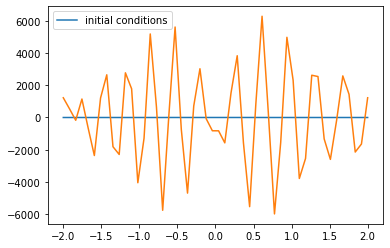

In [405]:
nx = 50
u = 1.0
C = 0.5

g = ftcs_advection(nx, u, C, init_cond=step)
fig = g.plot()
#bad soln as we need same function as initial condition after a cycle

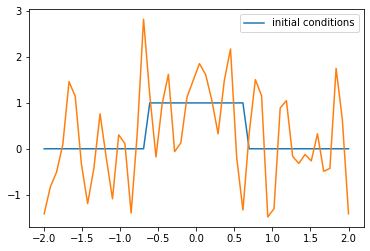

In [406]:
#reduce grid gap, i.e reduce C
C = 0.1
g = ftcs_advection(nx, u, C, init_cond=step)
fig = g.plot()
#not very accurate

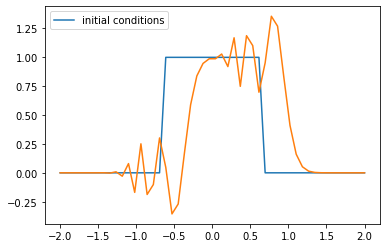

In [407]:
#reduce time period
g = ftcs_advection(nx, u, C, init_cond=step, num_periods=0.1)
fig = g.plot()
#looks better

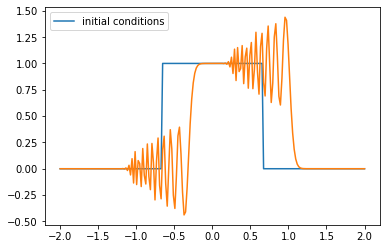

In [408]:
#increase grid points
nx = 200
g = ftcs_advection(nx, u, C, init_cond=step, num_periods=0.1)
fig = g.plot()
#even better

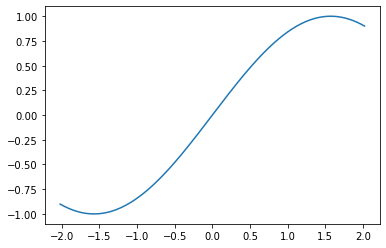

In [409]:
def sins(g):
    return [math.sin(i) for i in g.x]
type(sins)
plt.plot(g.x, sins(g))
plt.show()

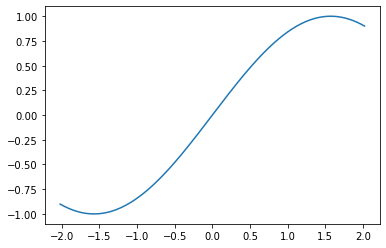

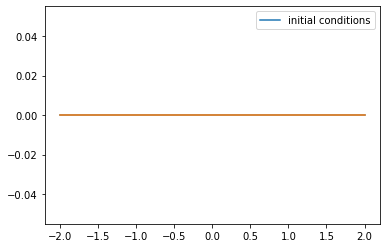

In [410]:
nx = 200
u = 0.1 
C = 0.1
plt.plot(g.x, sins(g))
g = ftcs_advection(nx, u, C, init_cond=sins, num_periods=0.1)
fig1 = g.plot()
#bad soln as we need same function as initial condition after a cycle